In [1]:
import pandas as pd

# df = pd.read_csv('SalesAnalysis/Sales_Data/Sales_April_2019.csv')
# df.tail()

# Read the folder 'SalesAnalysis/Sales_Data' and merge all the .csv files

In [2]:
import os

allFiles = [f for f in os.listdir('SalesAnalysis/Sales_Data')]

# create empty data-frame inorder to merge it with the new-dataframe ---> need to be initialted
all_months_data = pd.DataFrame()
[';uj  ']
for file in allFiles:
    #first need to read it then merge
    df = pd.read_csv('SalesAnalysis/Sales_Data/' + file)
    #now merge it with the old data-frame 
    all_months_data = pd.concat([all_months_data, df])

# now write it to a csv file
all_months_data.to_csv('all_datas.csv', index=False)


In [3]:
all_data = pd.read_csv('all_datas.csv')
all_data.head(3)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"


## steps to solve this problem
1. split the Order Date and create a new col ('Month')
2. add new col('Salse') for the total sale of every product
3. then use groupby to get the sum of every month

# find the NAN and drop it

In [4]:
all_data['Month'] = all_data['Order Date'].str[0:2]


In [5]:
# get the NaN cell
nan_cells = all_data[all_data['Month'].isna()]
nan_cells

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


# Clean the 'Or' at the month col
### Do not Drop the whole row instead use != 'Or'

In [6]:
all_data = all_data[all_data['Month'] != 'Or']
all_data['Month'] = all_data['Month'].astype('int32')

In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Add salse col by multipling the [Quantity Ordered with Price Each]

### first convert the Quantity Ordered to int

In [8]:
# all_data['Salse'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### now use the groupby to get the filtered sum of every month

In [9]:
groupby_result = all_data.groupby(['Month']).sum()
groupby_result

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


range(1, 13)


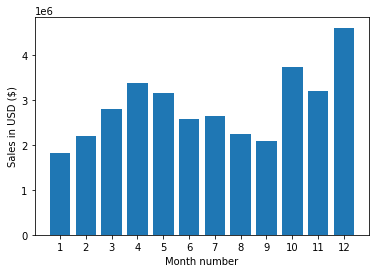

In [10]:

import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

# 2. What city has the highest number of salse

In [11]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# we must get the city and states as well 
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + " " + get_state(x))


In [12]:
all_data.head(3)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY


In [13]:
all_data.groupby(['City']).sum()

,Month,Sales
City,,
Atlanta GA,104794,2.795499e+06
Austin TX,69829,1.819582e+06
Boston MA,141112,3.661642e+06
Dallas TX,104620,2.767975e+06
Los Angeles CA,208325,5.452571e+06
New York City NY,175741,4.664317e+06
Portland ME,17144,4.497583e+05
Portland OR,70621,1.870732e+06
San Francisco CA,315520,8.262204e+06


In [14]:

all_data.groupby(['City']).sum()

,Month,Sales
City,,
Atlanta GA,104794,2.795499e+06
Austin TX,69829,1.819582e+06
Boston MA,141112,3.661642e+06
Dallas TX,104620,2.767975e+06
Los Angeles CA,208325,5.452571e+06
New York City NY,175741,4.664317e+06
Portland ME,17144,4.497583e+05
Portland OR,70621,1.870732e+06
San Francisco CA,315520,8.262204e+06


In [15]:
cities = [city for city in all_data['City']] # look 👇👇👇 with the groupby🐍🦅🐬
len(cities)

185950

# I am using groupby here cuz i do NOT want to have a repeated cities SO groupby will get us unique cities 🐍🦅🐬

In [16]:

cities = [city for city, df in all_data.groupby('City')]
len(cities)
cities

[' Atlanta GA',
 ' Austin TX',
 ' Boston MA',
 ' Dallas TX',
 ' Los Angeles CA',
 ' New York City NY',
 ' Portland ME',
 ' Portland OR',
 ' San Francisco CA',
 ' Seattle WA']

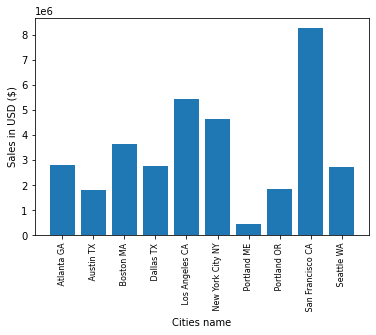

In [19]:
import matplotlib.pyplot as plt
# we are using the goupby for a reason 
# 1. we need to get on the unique cities by looping through the key(contry_names) and value(Product_names)

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities name')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#  Check the Series methods and df methods again

### what time should we display advetisments to maximize the likhood customers buying products ?

In [20]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston MA
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City NY
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco CA
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco CA


In [21]:
#  better to change the order-date to to_datetime ----> then get the hour 
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data

# get the hour from the order date by doing .dt.hour
all_data['Hour'] = all_data['Order Date'].dt.hour


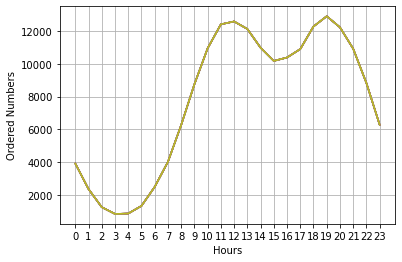

In [22]:
import matplotlib.pyplot as plt
hours = [hr for hr, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.ylabel('Ordered Numbers')
plt.xlabel('Hours')
plt.grid()
plt.show()

## we can do it for each city as well

## ==============================

# what products are most sold together

In [23]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18


In [24]:
new_df = all_data[all_data['Order ID'].duplicated(keep=False)]

new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-24-38c9fbdf6dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [25]:
new_df = new_df.drop_duplicates(['Order ID', 'Grouped'])

In [26]:
new_df  

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
16,295681,Google Phone,1,600,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City NY,14,"Vareebadd Phone,USB-C Charging Cable"
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin TX,12,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,iPhone,1,700,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston MA,14,"iPhone,Lightning Charging Cable"
76,295735,iPhone,1,700,2019-12-22 18:25:00,"374 Lincoln St, New York City, NY 10001",12,700.00,New York City NY,18,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
186798,222863,27in FHD Monitor,1,149.99,2019-06-07 11:05:00,"222 Walnut St, Austin, TX 73301",6,149.99,Austin TX,11,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,iPhone,1,700,2019-06-16 13:53:00,"505 North St, New York City, NY 10001",6,700.00,New York City NY,13,"iPhone,Apple Airpods Headphones"
186819,222882,Apple Airpods Headphones,1,150,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,150.00,Los Angeles CA,11,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,Google Phone,1,600,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,New York City NY,12,"Google Phone,USB-C Charging Cable"


In [27]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# print(count.most_common(10))
# for ke, va in count.items():
#     print(ke, va)
    

In [166]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
16,295681,Google Phone,1,600,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City NY,14,"Vareebadd Phone,USB-C Charging Cable"
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin TX,12,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,iPhone,1,700,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston MA,14,"iPhone,Lightning Charging Cable"
76,295735,iPhone,1,700,2019-12-22 18:25:00,"374 Lincoln St, New York City, NY 10001",12,700.00,New York City NY,18,"iPhone,Apple Airpods Headphones,Wired Headphones"


## Why i can NOT see the Quantity Order ?
<h3 style="background-color: yellow; width: 50%">because i want to find the most sold product</h3>

In [169]:
grouped_product = all_data.groupby(['Product'])
grouped_product.sum().tail(4)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7136 entries, 16 to 186842
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          7136 non-null   object        
 1   Product           7136 non-null   object        
 2   Quantity Ordered  7136 non-null   object        
 3   Price Each        7136 non-null   object        
 4   Order Date        7136 non-null   datetime64[ns]
 5   Purchase Address  7136 non-null   object        
 6   Month             7136 non-null   int32         
 7   Sales             7136 non-null   float64       
 8   City              7136 non-null   object        
 9   Hour              7136 non-null   int64         
 10  Grouped           7136 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7)
memory usage: 899.2+ KB


In [120]:
# i checked at specific column and i got zero
all_data['Quantity Ordered'].isnull().sum() 

0

In [121]:
# i checked through the etire df i got False
all_data.isnull().values.any()

False

In [103]:
# But when i count the orders it seems to count them corectly
all_data['Quantity Ordered'].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [49]:

data = {"Team": ["Red Sox", "Red Sox", "Red Sox", "Red Sox", "Red Sox", "Red Sox", "Yankees", "Yankees", "Yankees", "Yankees", "Yankees", "Yankees"],
        "Pos": ["Pitcher", "Pitcher", "Pitcher", "Not Pitcher", "Not Pitcher", "Not Pitcher", "Pitcher", "Pitcher", "Pitcher", "Not Pitcher", "Not Pitcher", "Not Pitcher"],
        "Age": [24, 28, 40, 22, 29, 33, 31, 26, 21, 36, 25, 31]}
df = pd.DataFrame(data)
# df

In [50]:
# group by Team, get mean, min, and max value of Age for each value of Team.
grouped_single = df.groupby('Team').sum()
grouped_single

,Age
Team,
Red Sox,176
Yankees,170


In [71]:
prices_grouped = all_data.groupby(['Product', 'Price Each']).mean()
print(prices_grouped)

                                          Month        Sales       Hour
Product                    Price Each                                  
20in Monitor               109.99      7.153377   110.740968  14.329188
27in 4K Gaming Monitor     389.99      7.133226   390.866382  14.593258
27in FHD Monitor           149.99      7.001199   150.849141  14.325296
34in Ultrawide Monitor     379.99      7.005986   381.096588  14.411260
AA Batteries (4-pack)      3.84        7.073820     5.157137  14.498809
AAA Batteries (4-pack)     2.99        7.091226     4.493040  14.404922
Apple Airpods Headphones   150         7.030809   151.087379  14.353786
                           150.0       8.595960   150.000000  15.535354
Bose SoundSport Headphones 99.99       7.062889   100.980520  14.442402
Flatscreen TV              300         7.124686   301.192469  14.346444
                           300.0       8.400000   300.000000  11.950000
Google Phone               600         6.925683   600.765027  14

In [139]:
data1 = {'Set1': [55,22,11,77,33, 100]} 
df1 = pd.DataFrame(data1, columns= ['Set1']) 

In [140]:
data2 = {'Set2': [23,45,21,73,48]} 
df2 = pd.DataFrame(data2, columns= ['Set2'])

In [141]:
data3 = df1['Set1'].map(str) + df2['Set2'].map(str)

In [144]:
concatenated = df1['Set1'].map(str) + " " + df2['Set2'].map(str)
combined = pd.DataFrame(concatenated, columns=['Combined Values'])
combined
# max1 = combined['Combined Values'].max()
# combined['Combined Values'].isnull().any()


,Combined Values
0,55 23
1,22 45
2,11 21
3,77 73
4,33 48
5,NaN


In [150]:
import pandas as pd
boxes = {'Color': ['Green','Green','Green','Blue','Blue','Red','Red','Red'],
         'Shape': ['Rectangle','Rectangle','Square','Rectangle','Square','Square','Square','Rectangle']
        }

d = pd.DataFrame(boxes, columns=['Color', 'Shape'])
d

,Color,Shape
0,Green,Rectangle
1,Green,Rectangle
2,Green,Square
3,Blue,Rectangle
4,Blue,Square
5,Red,Square
6,Red,Square
7,Red,Rectangle


In [149]:
d.value_counts()

Color  Shape    
Green  Rectangle    2
Red    Square       2
Blue   Rectangle    1
       Square       1
Green  Square       1
Red    Rectangle    1
dtype: int64

In [162]:
removed_dupli = d.drop_duplicates()

In [163]:
removed_dupli

,Color,Shape
0,Green,Rectangle
2,Green,Square
3,Blue,Rectangle
4,Blue,Square
5,Red,Square
7,Red,Rectangle
